**Mental Health in Tech(2016): EDA using Seaborn**
**OSMI Mental Health in Tech Survey 2016**

Currently over 1400 responses, the ongoing 2016 survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.

**How Will This Data Be Used?**
We are interested in gauging how mental health is viewed within the tech/IT workplace, and the prevalence of certain mental health disorders within the tech industry. The Open Sourcing Mental Illness team of volunteers will use this data to drive our work in raising awareness and improving conditions for those with mental health disorders in the IT workplace.

### 1.Business Understanding
### 2.Business Questions & Data Requirement
### 3.Data Understanding
    . Data shape: # of rows, # columns
    . Data types: numerical, ordinal, categorical, nominal
    . Missing values: count, pattern
### 4.Check Data Quality & Data Preparation
    . distributions, frequency
    . dealing with missing values 
    . dealing outliers
    . dealing with messy data
### 5. Statistical Analysis & Model Building To Address Business Questions
    .Descriptive: Mean, median, mode, variance, std, percentage, Q1, medium, Q3, range
    .Inferential: Correlations r, chi-square of indepence test, t-test, ANOVA
    .Model building: 
        .type:classification, regression. clustering 
        .models:linear regression, logistic regression, decsion tree, random forest, K-means, heiracical clustering
### 6. Draw Conclusions
### 7. Communicating Through Story Telling!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
## understanding data
mh = pd.read_csv('datasets/survey_16.csv')
print(mh.shape)

#print(mh.columns[:5] # uncomment to print

## check data type
#print(mh.info()) # uncomment to print

## check numeric variables
#print(mh.describe()) # uncomment to print

## check missing values
#print(mh.isnull().sum()) # uncomment to print

#print(mh.head(2))# uncomment to print

(1433, 63)


In [19]:
(mh.dtypes.values)

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O')], dtype=object)

## 4. Check Data quality & Data preparation

### 4.1 Dealing with missing data
#### ## select ONLY columns that have missing values <300 out of 1433 (missing less than 21% ) for further analysis

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

Index(['Is your primary role within your company related to tech/IT?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Do you know local or online resources to seek help for a mental health disorder?',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
       'Do you believe your productivity is ever affected by a mental health

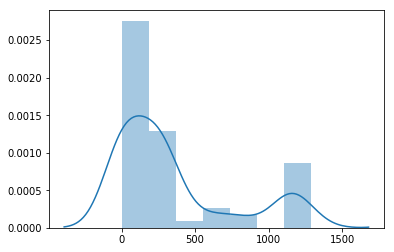

In [3]:
## check missing pattern
print(mh.isnull().sum())
sns.distplot(mh.isnull().sum()) 

## make a copy of the original data
df = mh.copy()

########################## Columns with Missing values > 300 #####################################################################
## columns with more than 300 missing values --  behaviors behind the missing pattern
## Possibly there is a reason why the pariticipants tend to "refuse" to answer the questions -- worth further investigation

col_m = df.isnull().sum() > 300 
cols_m= col_m[col_m==True]
#print(len(cols_m))
df_missing = df[cols_m.index]
#print(df_missing.shape)
df_missing.columns

In [4]:
## select ONLY columns that have missing values <300 out of 1433 (missing less than 21% ) for further analysis
col = df.isnull().sum() < 300 
cols = col[col==True]
print(len(cols))
df1 = df[cols.index]
print(df1.shape)
# df1.columns

45
(1433, 45)


### 4.2 Dealing with outliers

ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'With outliers removed')

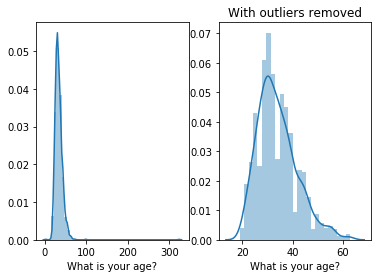

In [5]:
## check demographic information
fig,axs = plt.subplots(1,2)
fig1 =sns.distplot(df1["What is your age?"],ax = axs[0])

## remove outliers
df1["age"] = df1["What is your age?"]
df2 = df1[(18 < df1["age"])  & (df1["age"] < 65)]
fig2 = sns.distplot(df2["What is your age?"], ax = axs[1])
fig2.set_title("With outliers removed")

In [6]:
 ### 4.3 clean up messy data and recode

In [7]:
 #print(df1["What is your gender?"].unique())
mylist = ["Male","Man","man","male","MALE","female","Female", "F","M","f","m","woman","Woman"]

gender= df2["What is your gender?"].apply(lambda x: (x in mylist)) ## Return True/False
df2["What is your gender?"] = df2["What is your gender?"][gender]  ## Only retain True 

print(df1.shape)
#df1["What is your gender?"].unique()

## Recoding
mapping =({"male":"Male",
           "Man":"Male",
           "man":"Male",
           "m":"Male",
           "M":"Male",
           "MALE":"Male",
           "Male":"Male",
           "woman":"Female",
           "Woman":"Female",
           "Female":"Female",
           "female":"Female",
           "f":"Female",
           "F":"Female"})

df2['gender'] = df2["What is your gender?"].map(mapping)
print(df2['gender'].value_counts())

(1433, 46)
Male      1024
Female     315
Name: gender, dtype: int64
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 4.4 organize items

## 5. Statistical analysis & model building to address business Questions****

In [8]:
## Group items into sub groups for further analysis

## demographic
print("Demographic info")
print(df2.columns[39:43])
print()

## status
print("status")
print(df2.columns[[0,32,33,34,35,36,37,38]])
print()

##info about company
print("info about company")
print(df2.columns[[1,2]])
print()

## related to previous employers
print("Items related to previous employers")
print(df2.columns[15:25])
print()

## health insurance coverage
print("Mental health coverage&resources")
print(df2.columns[[3,4,5]])
print()

## Mental health conseuqences
print("Mental health consequences")
print(df2.columns[[6,7,8,9,10,11,28,29]])
print()

## Past experiences
print()
print("Past experiences")
print(df2.columns[[13,31]])

## Willing to talk
print()
print("Willing to talk about")
print(df2.columns[[26,27,30]])

Demographic info
Index(['What is your age?', 'What is your gender?',
       'What country do you live in?', 'What country do you work in?'],
      dtype='object')

status
Index(['Are you self-employed?',
       'Do you have a family history of mental illness?',
       'Have you had a mental health disorder in the past?',
       'Do you currently have a mental health disorder?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'],
      dtype='object')

info about company
Index(['How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?'], dty

## Data is ready for analyses

In [9]:
print(df2.shape)
print()
print(df2.iloc[:,2].value_counts(dropna = False))
print()
df_f = df2[df2.iloc[:,2] == 1] ## include ONLY Tech company workers for further analyisis ==> N =878
print(df_f.shape)

(1424, 47)

1.0    878
NaN    285
0.0    261
Name: Is your employer primarily a tech company/organization?, dtype: int64

(878, 47)


## Q1: What percentage of workers reported having mental health conditions?
 Results suggest:
 39% of the 878 workers reported having mental health conditions

## Q1.1 Is there gender difference in the reported percentage?

 Results suggest: 
 there is gender difference in the reported percentage of having mental health conditions( p = 3.1277631957860236e-06 < .001).
 Higher percentage of Female workers(53%) reported having mental health conditions than Male workers(35%)
 Higher percentage of Male workers(24%) reported Maybe having mental health conditions than Female workers(17%)

gender                                           Female  Male
Do you currently have a mental health disorder?              
Maybe                                                32   153
No                                                   53   272
Yes                                                  99   213
gender                                              Female       Male
Do you currently have a mental health disorder?                      
Maybe                                            17.391304  23.981191
No                                               28.804348  42.633229
Yes                                              53.804348  33.385580


Text(0.5, 1.0, 'Mental health by Gender')

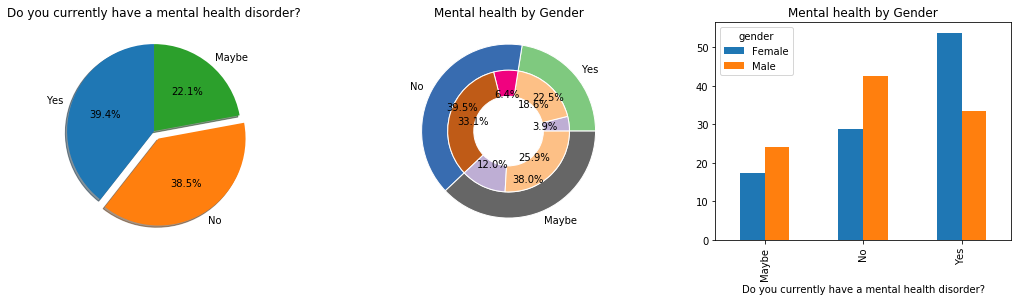

In [10]:
fig,axs = plt.subplots(1,3, figsize=(18,4))
#fig.suptitle("mentall health by gender")

## Mental health
mhc_labels = ["Yes","No","Maybe"]
mhc_size = df_f.iloc[:,34].value_counts()
explode = (0,0.1,0)
axs[0].pie(mhc_size, labels = mhc_labels,explode = explode,shadow = True, startangle = 90,autopct='%1.1f%%')
axs[0].set_title(df1.columns[34])

## mhc by gender
table = df_f.pivot_table(index = df_f.columns[34], columns = "gender" ,values = df_f.columns[0], aggfunc = len)
table_per = 100 * table/table.sum()

print(table)
print(table_per)
vals = np.array(table)

cmap = plt.get_cmap("Accent")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1,2,5,6])

outer_label = ["Yes","No","Maybe"]  ## Be careful with the order of labeling

axs[1].pie(vals.sum(axis=1), radius=1, colors=outer_colors,labels = outer_label,
       wedgeprops=dict(width=0.3, edgecolor='w'),autopct='%1.1f%%')

axs[1].pie(vals.flatten(), radius=1-0.3, colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='w'),autopct='%1.1f%%')   ## can't do inner label, needs to be improved, otherwise 
axs[1].set_title("Mental health by Gender")
                                                                      ## the nested pie chart is limited in usefulness

table_per.plot(kind="bar",ax = axs[2]) ## a bar plot conveys information more clearly in this case
axs[2].set_title("Mental health by Gender")

In [11]:
## Chi-square test to statistical validate
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(table, correction=False)
print("chi-square: ", chi2)
print("p value: ", p)
print("degrees of freedom: ", dof)
print("expected", ex)

chi-square:  25.35038488563788
p value:  3.1277631957860236e-06
degrees of freedom:  2
expected [[ 41.41119221 143.58880779]
 [ 72.74939173 252.25060827]
 [ 69.83941606 242.16058394]]


### Q2: What percentage of employers provide mental health coverage?
Results suggest:
60% of the reported employers provide mental health coverage

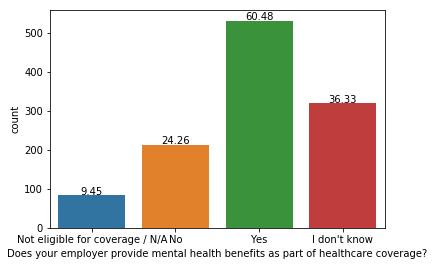

In [12]:
ax = sns.countplot(df1.iloc[:,3])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format(100*height/float(len(df_f))),
            ha="center") 

## Q3: How do workers view mental health ?
 ### Q 3.1: Do workers believe mental health condition will have negative consequences?
 
Results suggest: 

A majority of workers(65%) not sure about whether they are protected or not if taking advantage of mental health provided by employer

workers tend to think mental health will more likely(18%) to have negative consequences than physial health condition(3%), with 40% of them think they will be no negative consequences of mental health condition, and 41% of them are uncertain about the
consequences

workers tend to more likely tell direct supervior(38%) about mental health condition than to tell coworkers(25%)

workers's work is more likely(37%) being oftenly interfered if mental health is not effectively treated than being effectivly treated(4%)

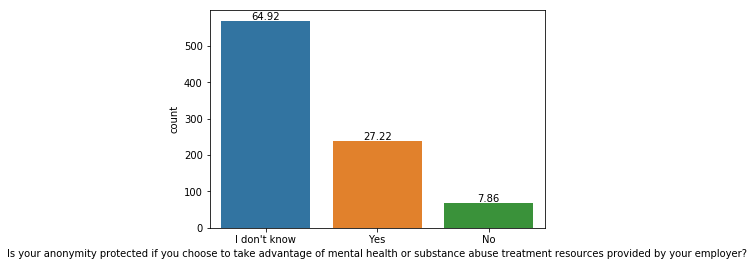

In [13]:
ax = sns.countplot(df_f.iloc[:,6])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format(100*height/float(len(df_f))),
            ha="center")

## Q3: How do workers view mental health ?
 ### Q 3.1: Do workers believe mental health condition will have negative consequences?
 
Results suggest: 

A majority of workers(65%) not sure about whether they are protected or not if taking advantage of mental health provided by employer

workers tend to think mental health will more likely(18%) to have negative consequences than physial health condition(3%), with 40% of them think they will be no negative consequences of mental health condition, and 41% of them are uncertain about the
consequences

workers tend to more likely tell direct supervior(38%) about mental health condition than to tell coworkers(25%)

workers's work is more likely(37%) being oftenly interfered if mental health is not effectively treated than being effectivly treated(4%)

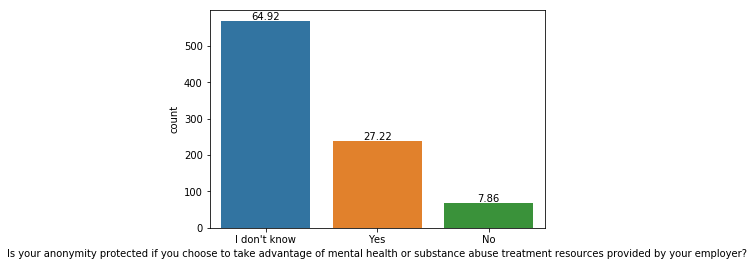

In [14]:
ax = sns.countplot(df_f.iloc[:,6])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format(100*height/float(len(df_f))),
            ha="center")

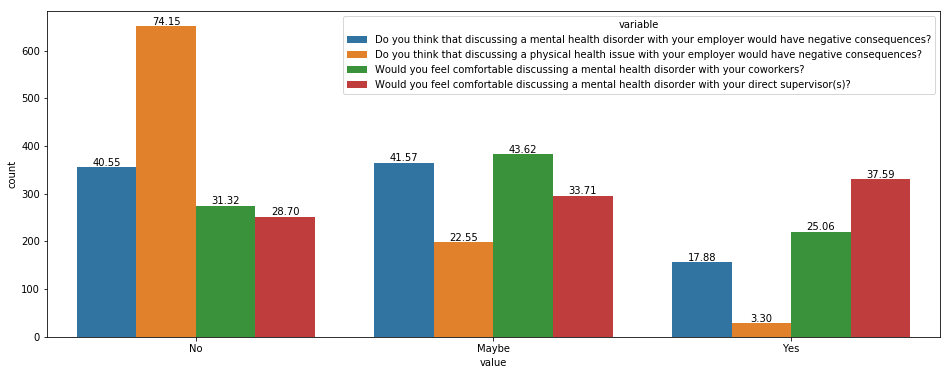

In [15]:
##  Descriptive 

plt.figure(figsize=(16,6))
df_f1 = df_f.iloc[:,8:12]
ax = sns.countplot(hue="variable", x="value",  data=pd.melt(df_f1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format(100*height/float(len(df_f))),
            ha="center") 
#ax.legend("upper center")
#warnings.simplefilter("ignore")
#df_f2 = df_f.iloc[:,28:30]
#sns.countplot(hue="variable", x="value", data=pd.melt(df_f2),ax = axs[1])


##"https://stackoverflow.com/questions/46223224/matplotlib-plot-countplot-for-two-or-more-column-on-single-plot"
## Seaborn usually works best with long form datasets. 
##I.e. instead of 3 columns with different options for each attribute you would have two columns, 
##one for the options and one for the attributes. This can easily be created via pd.melt. 
##Then the hue value can be used on the "options" column:

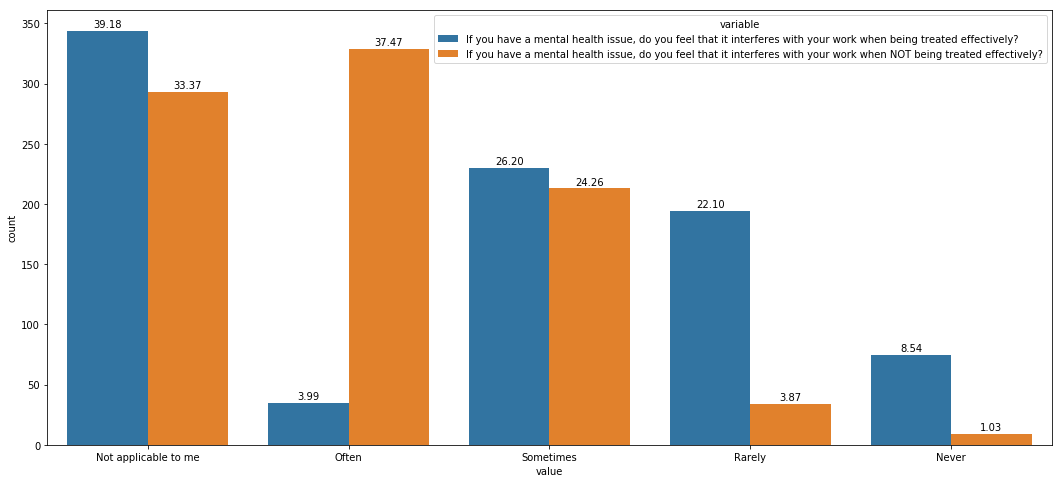

In [16]:
plt.figure(figsize=(18,8))
df_f1 = df_f.iloc[:,37:39]
ax = sns.countplot(hue="variable", x="value", 
                   order =["Not applicable to me","Often","Sometimes","Rarely","Never"],  data=pd.melt(df_f1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format(100*height/float(len(df_f))),
            ha="center") 

### Q4: Are workers willing to tell if they have mental health conditions?
### Q4.1: Is gender related to the willingness to tell if have mental health conditions?
### Q4.2: Is age related to the willingness to tell if have mental health conditions?
### Q4.3: Is mental health insurance coverage related to the willingness to tell if have mental health conditions?
### Q4.4: Is anonymity protected or not related to the willingness to tell if have mental health conditions?

Results suggest:
workers are more likely(63%) to avoid bringing up about mental health condition than physical health(33%) with a potential employer

Female workers tend to more likely(76%) to aovid bringing up mental health condition than male coworkers(59%) with a potential employer

No significant age difference observed in the willingness to tell.

No evidence suggest willingness to tell is realted to menth health insurance coverage

If workers who are nt sure about whether is anonymity protected are slightly more likely to NOT tell about mental health condition.

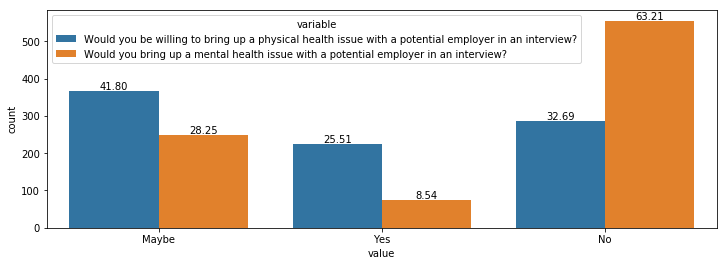

In [17]:
plt.figure(figsize=(12,4))
df_f1 = df_f.iloc[:,26:28]
ax = sns.countplot(hue="variable", x="value", data=pd.melt(df_f1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format(100*height/float(len(df_f))),
            ha="center") 

gender                                                 Female       Male
Would you bring up a mental health issue with a...                      
Maybe                                               21.739130  30.877743
No                                                  75.543478  58.934169
Yes                                                  2.717391  10.188088
chi-square:  19.784700210751794
p value:  5.0559984971030866e-05
degrees of freedom:  2
expected [[ 53.05109489 183.94890511]
 [115.27980535 399.72019465]
 [ 15.66909976  54.33090024]]


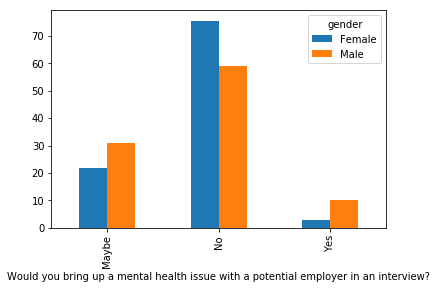

In [18]:
## Q5: Is gender related to the willingness to tell if have mental health conditions?

pivot_table = df_f.pivot_table(index = df_f.columns[27], columns = "gender", values = df_f.columns[0], aggfunc = len)
#pivot_table.plot(kind="bar")

pivot_table_per = 100 * pivot_table/pivot_table.sum()
print(pivot_table_per)
pivot_table_per.plot(kind="bar")

chi2, p, dof, ex = chi2_contingency(pivot_table, correction=False)
print("chi-square: ", chi2)
print("p value: ", p)
print("degrees of freedom: ", dof)
print("expected", ex)

ipykernel_launcher:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sum_sq,df,F,PR(>F)
Intercept,113655.959080,1.0,2227.683212,1.005076e-235
C(gender),86.266329,1.0,1.690840,1.938565e-01
C(bring_up),9.876409,2.0,0.096790,9.077570e-01
Residual,41734.199030,818.0,NaN,NaN


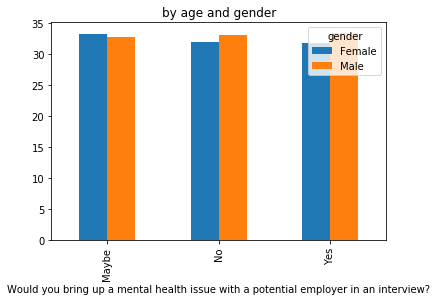

In [19]:
pivot_table = df_f.pivot_table(index = df_f.columns[27], columns = "gender", values = "age", aggfunc = np.mean)
pivot_table.plot(kind="bar")
plt.title("by age and gender")

import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model

df_f["bring_up"] = df_f[df_f.columns[27]]
model = ols('age ~ C(gender) + C(bring_up)', data=df_f).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

chi-square:  7.632980307376446
p value:  0.26624362979065674
degrees of freedom:  6
expected [[ 67.7904328  151.70842825  20.50113895]
 [ 47.7357631  106.82801822  14.43621868]
 [ 18.35990888  41.08769932   5.5523918 ]
 [114.11389522 255.37585421  34.51025057]]


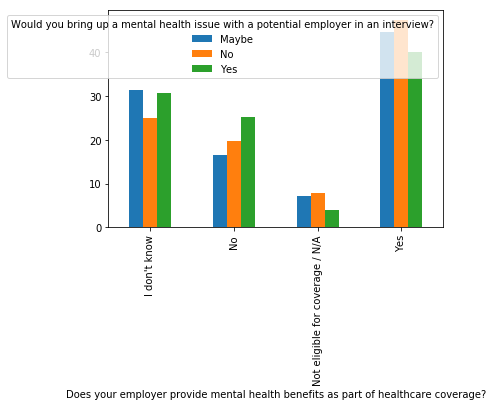

In [20]:
pivot_table = df_f.pivot_table(index = df_f.columns[3], columns = df_f.columns[27], values = df_f.columns[0], aggfunc = len)
#pivot_table.plot(kind="bar")

pivot_table_per = 100 * pivot_table/pivot_table.sum()
#print(pivot_table_per)
pivot_table_per.plot(kind="bar")

chi2, p, dof, ex = chi2_contingency(pivot_table, correction=False)
print("chi-square: ", chi2)
print("p value: ", p)
print("degrees of freedom: ", dof)
print("expected", ex)

## 6. Draw conclusions

--TODO

## 7. Telling stories